In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
warnings.filterwarnings('ignore')

### Laod Data

In [3]:
df = pd.read_csv('dataset_diabetes\\diabetic_data.csv')
df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

# Part One: Preporcessing

### Data Explore

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.head()

encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  

[5 rows x 50 columns]

In [6]:
df.describe().T

count          mean           std      min  \
encounter_id              101766.0  1.652016e+08  1.026403e+08  12522.0   
patient_nbr               101766.0  5.433040e+07  3.869636e+07    135.0   
admission_type_id         101766.0  2.024006e+00  1.445403e+00      1.0   
discharge_disposition_id  101766.0  3.715642e+00  5.280166e+00      1.0   
admission_source_id       101766.0  5.754437e+00  4.064081e+00      1.0   
time_in_hospital          101766.0  4.395987e+00  2.985108e+00      1.0   
num_lab_procedures        101766.0  4.309564e+01  1.967436e+01      1.0   
num_procedures            101766.0  1.339730e+00  1.705807e+00      0.0   
num_medications           101766.0  1.602184e+01  8.127566e+00      1.0   
number_outpatient         101766.0  3.693572e-01  1.267265e+00      0.0   
number_emergency          101766.0  1.978362e-01  9.304723e-01      0.0   
number_inpatient          101766.0  6.355659e-01  1.262863e+00      0.0   
number_diagnoses          101766.0  7.422607e+00  1.933600e+00      1.0   

                                 25%          50%           75%          max  
encounter_id              84961194.0  152388987.0  2.302709e+08  443867222.0  
patient_nbr               23413221.0   45505143.0  8.754595e+07  189502619.0  
admission_type_id                1.0          1.0  3.000000e+00          8.0  
discharge_disposition_id         1.0          1.0  4.000000e+00         28.0  
admission_source_id              1.0          7.0  7.000000e+00         25.0  
time_in_hospital                 2.0          4.0  6.000000e+00         14.0  
num_lab_procedures              31.0         44.0  5.700000e+01        132.0  
num_procedures                   0.0          1.0  2.000000e+00          6.0  
num_medications                 10.0         15.0  2.000000e+01         81.0  
number_outpatient                0.0          0.0  0.000000e+00         42.0  
number_emergency                 0.0          0.0  0.000000e+00         76.0  
number_inpatient                 0.0          0.0  1.000000e+00         21.0  
number_diagnoses                 6.0          8.0  9.000000e+00         16.0

In [7]:
df.shape

(101766, 50)

### Data Missing

In [8]:
missing_values = df.isnull().sum()
missing_values

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Unique Value

In [9]:
for column in df.columns:
    print(f"{column}:\n {df[column].unique()}")
    print("-----------------------------------------------------------------------")

encounter_id:
 [  2278392    149190     64410 ... 443854148 443857166 443867222]
-----------------------------------------------------------------------
patient_nbr:
 [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
-----------------------------------------------------------------------
race:
 ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
-----------------------------------------------------------------------
gender:
 ['Female' 'Male' 'Unknown/Invalid']
-----------------------------------------------------------------------
age:
 ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
-----------------------------------------------------------------------
weight:
 ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
-----------------------------------------------------------------------
admission_type_id:
 [6 1 2 3 4 5 8 7]
----------------------------------

#### Replacing Specific Values with NaN in DataFrame

In [10]:
id_map_column = ['?', 'Unknown/Invalid', 'NULL', 'Not Available', 'Not Mapped']
for i in range(len(id_map_column)):
    df.replace(id_map_column[i], pd.NA, inplace=True)

In [11]:
missing_values = df.isnull().sum()
print('-------------------------------------------------------------------------------')
missing_data = df.isna().mean() * 100
missing_data[missing_data > 0].sort_values(ascending=False)

-------------------------------------------------------------------------------


weight               96.858479
max_glu_serum        94.746772
A1Cresult            83.277322
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
gender                0.002948
dtype: float64

#### Converting bins in numerical age and weight which is mean of the corresponding bucket e.g [70-80) -> 75


In [12]:
df.age = df.age.replace({"[70-80)":75, "[60-70)":65, "[50-60)":55, "[80-90)":85, "[40-50)":45, "[30-40)":35, "[90-100)":95, "[20-30)":25, "[10-20)":15, "[0-10)":5})
df["weight"]=df["weight"].replace({"[75-100)":85,"[50-75)":60,"[100-125)":110,"[125-150)":135,"[25-50)":35,"[0-25)":10,"[150-175)":160,"[175-200)":185,">200":205})

#### Drop Unnecessary Columns

In [13]:
df.drop(['encounter_id', 'max_glu_serum', 'weight', 'A1Cresult', 'patient_nbr'], axis=1, inplace=True)

In [14]:
#Impute missing values with most common category
most_common_specialty = df['medical_specialty'].mode()[0]
most_common_payer_code = df['payer_code'].mode()[0]
most_common_race = df['race'].mode()[0]
most_common_gender = df['gender'].mode()[0]
most_common_diag1 = df['diag_1'].mode()[0]
most_common_diag2 = df['diag_2'].mode()[0]
most_common_diag3 = df['diag_3'].mode()[0]
most_common_ati = df['admission_type_id'].mode()[0]
most_common_ddi = df['discharge_disposition_id'].mode()[0]
most_common_asi = df['admission_source_id'].mode()[0]

df['medical_specialty'].fillna(most_common_specialty, inplace=True)
df['payer_code'].fillna(most_common_payer_code, inplace=True)
df['race'].fillna(most_common_race, inplace=True)
df['gender'].fillna(most_common_gender, inplace=True)
df['diag_1'].fillna(most_common_diag1, inplace=True)
df['diag_2'].fillna(most_common_diag2, inplace=True)
df['diag_3'].fillna(most_common_diag3, inplace=True)
df['admission_type_id'].fillna(most_common_ati, inplace=True)
df['discharge_disposition_id'].fillna(most_common_ddi, inplace=True)
df['admission_source_id'].fillna(most_common_asi, inplace=True)

df.isna().sum().max()

0

#### Parsing Mappings from CSV File

The `parse_mappings` function reads a CSV file to create dictionaries mapping IDs to descriptions for three categories: `admission_type_id`, `discharge_disposition_id`, and `admission_source_id`.

#### Methodology
- **Initialize** dictionaries for each category.
- **Read** and clean each row of the CSV file.
- **Identify** the category or map ID to description based on the row content.
- **Return** the filled dictionaries.


In [15]:
def parse_mappings(filepath):
    
    mappings = {
        'admission_type_id': {},
        'discharge_disposition_id': {},
        'admission_source_id': {}
    }
    
    current_category = None
    
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            row = [x.strip() for x in row if x.strip()]
            if not row:
                continue
            
            if row[0] in mappings:
                current_category = row[0]
            elif current_category and len(row) >= 2:
                id, description = row[0], ','.join(row[1:])
                mappings[current_category][id] = description

    return mappings

mappings = parse_mappings('dataset_diabetes\\IDs_mapping.csv')
print(mappings['admission_type_id'])
print(mappings['discharge_disposition_id'])
print(mappings['admission_source_id'])


{'1': 'Emergency', '2': 'Urgent', '3': 'Elective', '4': 'Newborn', '5': 'Not Available', '6': 'NULL', '7': 'Trauma Center', '8': 'Not Mapped'}
{'1': 'Discharged to home', '2': 'Discharged/transferred to another short term hospital', '3': 'Discharged/transferred to SNF', '4': 'Discharged/transferred to ICF', '5': 'Discharged/transferred to another type of inpatient care institution', '6': 'Discharged/transferred to home with home health service', '7': 'Left AMA', '8': 'Discharged/transferred to home under care of Home IV provider', '9': 'Admitted as an inpatient to this hospital', '10': 'Neonate discharged to another hospital for neonatal aftercare', '11': 'Expired', '12': 'Still patient or expected to return for outpatient services', '13': 'Hospice / home', '14': 'Hospice / medical facility', '15': 'Discharged/transferred within this institution to Medicare approved swing bed', '16': 'Discharged/transferred/referred another institution for outpatient services', '17': 'Discharged/transf

In [16]:
id_map_column = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for i in range(len(id_map_column)):
    mapp_key = mappings[id_map_column[i]]
    for row in range(1,len(df)+1):
        for num_key in mapp_key.keys():
            if row == (int(num_key)):
                df[id_map_column[i]].replace(row, mapp_key[str(row)], inplace=True)
        
df.head()

race  gender  age admission_type_id discharge_disposition_id  \
0        Caucasian  Female    5              NULL               Not Mapped   
1        Caucasian  Female   15         Emergency       Discharged to home   
2  AfricanAmerican  Female   25         Emergency       Discharged to home   
3        Caucasian    Male   35         Emergency       Discharged to home   
4        Caucasian    Male   45         Emergency       Discharged to home   

  admission_source_id  time_in_hospital payer_code         medical_specialty  \
0  Physician Referral                 1         MC  Pediatrics-Endocrinology   
1      Emergency Room                 3         MC          InternalMedicine   
2      Emergency Room                 2         MC          InternalMedicine   
3      Emergency Room                 2         MC          InternalMedicine   
4      Emergency Room                 1         MC          InternalMedicine   

   num_lab_procedures  ...  citoglipton  insulin  glyburide-metformin  \
0                  41  ...           No       No                   No   
1                  59  ...           No       Up                   No   
2                  11  ...           No       No                   No   
3                  44  ...           No       Up                   No   
4                  51  ...           No   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone metformin-rosiglitazone  \
0                   No                        No                      No   
1                   No                        No                      No   
2                   No                        No                      No   
3                   No                        No                      No   
4                   No                        No                      No   

  metformin-pioglitazone change  diabetesMed readmitted  
0                     No     No           No         NO  
1                     No     Ch          Yes        >30  
2                     No     No          Yes         NO  
3                     No     Ch          Yes         NO  
4                     No     Ch          Yes         NO  

[5 rows x 45 columns]

#### <b>Medical Specialty</b> - An integer value corresponding to 84 distinct specialties of the admitting physician, such as cardiology, internal medicine, family medicine, and surgeon
- Therefore, regrouping into the top 10 segment to avoid a lot of categories

In [17]:
top_10=['InternalMedicine','Family/GeneralPractice','Cardiology','Surgery-General', "Nephrology","Orthopedics","Radiologist","Pulmonology"]
df.loc[~df['medical_specialty'].isin(top_10),'medical_specialty']='Other'

#### <b>Diag1, Diag2 and Diag3</b> - Diagnose section there are lot of ICD-9 IDs belong to specific category of disease. So we will map each of the code to the catefory

In [18]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)
    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"
        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)
    return data
df = map_diagnosis(df,["diag_1","diag_2","diag_3"])

In [19]:
df.head()

race  gender  age admission_type_id discharge_disposition_id  \
0        Caucasian  Female    5              NULL               Not Mapped   
1        Caucasian  Female   15         Emergency       Discharged to home   
2  AfricanAmerican  Female   25         Emergency       Discharged to home   
3        Caucasian    Male   35         Emergency       Discharged to home   
4        Caucasian    Male   45         Emergency       Discharged to home   

  admission_source_id  time_in_hospital payer_code medical_specialty  \
0  Physician Referral                 1         MC             Other   
1      Emergency Room                 3         MC  InternalMedicine   
2      Emergency Room                 2         MC  InternalMedicine   
3      Emergency Room                 2         MC  InternalMedicine   
4      Emergency Room                 1         MC  InternalMedicine   

   num_lab_procedures  ...  citoglipton  insulin  glyburide-metformin  \
0                  41  ...           No       No                   No   
1                  59  ...           No       Up                   No   
2                  11  ...           No       No                   No   
3                  44  ...           No       Up                   No   
4                  51  ...           No   Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone metformin-rosiglitazone  \
0                   No                        No                      No   
1                   No                        No                      No   
2                   No                        No                      No   
3                   No                        No                      No   
4                   No                        No                      No   

  metformin-pioglitazone change  diabetesMed readmitted  
0                     No     No           No         NO  
1                     No     Ch          Yes        >30  
2                     No     No          Yes         NO  
3                     No     Ch          Yes         NO  
4                     No     Ch          Yes         NO  

[5 rows x 45 columns]

### Normalizing and Removing Outliers from Numerical Columns

In [20]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_binary_numerical_columns = [col for col in numerical_columns if df[col].nunique() > 2]

scaler = MinMaxScaler()
df[non_binary_numerical_columns] = scaler.fit_transform(df[non_binary_numerical_columns])

Q1 = df[non_binary_numerical_columns].quantile(0.25)
Q3 = df[non_binary_numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[non_binary_numerical_columns] < (Q1 - 1.5 * IQR)) | (df[non_binary_numerical_columns] > (Q3 + 1.5 * IQR))).sum()

print(outliers)

df = df[~((df[non_binary_numerical_columns] < (Q1 - 1.5 * IQR)) |(df[non_binary_numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


age                    2509
time_in_hospital       2252
num_lab_procedures      143
num_procedures         4954
num_medications        2945
number_outpatient     16739
number_emergency      11383
number_inpatient       7049
number_diagnoses        281
dtype: int64


In [21]:
df.reset_index(drop=True, inplace=True)



**Removed single category columns**:
    - `examide`, `citoglipton`

**Binary Encoding**:
    - Converted `gender`, `change`, and `diabetesMed` columns using dictionary mappings.

**One-Hot Encoding**:
    - Applied `OneHotEncoder` to the specified columns.
    - Dropped the original columns and joined the one-hot encoded columns.


In [22]:
single_category_cols = ['examide', 'citoglipton']
df.drop(columns=single_category_cols, inplace=True)

df['gender'].replace('Male', 1, inplace=True)
df['gender'].replace('Female', 0, inplace=True)

df['change'].replace('Ch', 1, inplace=True) 
df['change'].replace('No', 0, inplace=True)

df['diabetesMed'].replace('Yes', 1, inplace=True)
df['diabetesMed'].replace('No', 0, inplace=True)


one_hot_cols = ['race', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
    'miglitol', 'tolazamide', 'insulin', 'glyburide-metformin', 'readmitted',
    'acetohexamide', 'tolbutamide', 'troglitazone', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df[one_hot_cols])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(one_hot_cols))
df = df.drop(one_hot_cols, axis=1).join(one_hot_encoded_df)


df


gender       age  time_in_hospital  num_lab_procedures  num_procedures  \
0           1  0.333333          0.076923            0.328244        0.166667   
1           1  0.444444          0.000000            0.381679        0.000000   
2           1  0.666667          0.230769            0.526718        0.166667   
3           1  0.777778          0.307692            0.549618        0.000000   
4           0  1.000000          0.846154            0.244275        0.500000   
...       ...       ...               ...                 ...             ...   
65475       0  0.777778          0.307692            0.152672        0.166667   
65476       1  0.777778          0.153846            0.381679        0.000000   
65477       0  0.888889          0.307692            0.244275        0.500000   
65478       0  0.888889          0.692308            0.335878        0.333333   
65479       1  0.777778          0.384615            0.091603        0.500000   

       num_medications  number_outpatient  number_emergency  number_inpatient  \
0               0.1875                0.0               0.0          0.000000   
1               0.0875                0.0               0.0          0.000000   
2               0.2500                0.0               0.0          0.000000   
3               0.1375                0.0               0.0          0.000000   
4               0.2125                0.0               0.0          0.000000   
...                ...                ...               ...               ...   
65475           0.1875                0.0               0.0          0.047619   
65476           0.1875                0.0               0.0          0.000000   
65477           0.2125                0.0               0.0          0.047619   
65478           0.2500                0.0               0.0          0.047619   
65479           0.0250                0.0               0.0          0.000000   

       number_diagnoses  ...  diag_2_Respiratory  diag_3_Circulatory  \
0              0.400000  ...                 0.0                 1.0   
1              0.266667  ...                 0.0                 0.0   
2              0.400000  ...                 0.0                 0.0   
3              0.466667  ...                 1.0                 0.0   
4              0.466667  ...                 0.0                 0.0   
...                 ...  ...                 ...                 ...   
65475          0.533333  ...                 1.0                 0.0   
65476          0.533333  ...                 0.0                 1.0   
65477          0.533333  ...                 0.0                 0.0   
65478          0.533333  ...                 0.0                 0.0   
65479          0.533333  ...                 0.0                 0.0   

       diag_3_Diabetes  diag_3_Digestive  diag_3_Genitourinary  diag_3_Injury  \
0                  0.0               0.0                   0.0            0.0   
1                  1.0               0.0                   0.0            0.0   
2                  0.0               0.0                   0.0            0.0   
3                  1.0               0.0                   0.0            0.0   
4                  0.0               0.0                   0.0            0.0   
...                ...               ...                   ...            ...   
65475              0.0               0.0                   0.0            0.0   
65476              0.0               0.0                   0.0            0.0   
65477              0.0               1.0                   0.0            0.0   
65478              0.0               0.0                   0.0            1.0   
65479              0.0               1.0                   0.0            0.0   

       diag_3_Muscoloskeletal  diag_3_Neoplasms  diag_3_Other  \
0                         0.0               0.0           0.0   
1                         0.0               0.0           0.0   
2                         0.

# Part Two: Dimensionality Reduction

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65480 entries, 0 to 65479
Columns: 188 entries, gender to diag_3_Respiratory
dtypes: float64(185), int64(3)
memory usage: 93.9 MB


Using `PCA` for dimensionality reduction

In [24]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA()
X_reduced = pca.fit_transform(df)

understanding how many principal components are needed to retain a certain percentage of the total variance in the dataset, aiding in the decision-making process for dimensionality reduction through PCA.

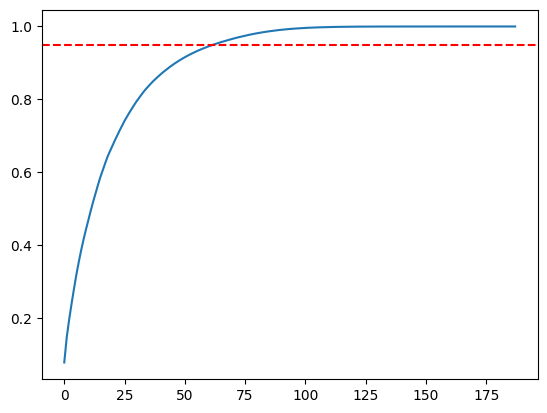

In [48]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [49]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(df)

# Part Three: Unsupervised Learning

## Silhouette Method

- The purpose of this code is to evaluate the quality of K-Means clustering results by calculating silhouette scores for different numbers of clusters and visualizing the scores to identify the optimal number of clusters.

- By utilizing these functions, the code allows for a systematic evaluation of K-Means clustering performance across different numbers of clusters, aiding in the selection of the optimal number of clusters based on silhouette score.

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

def calculate_silhouette_scores(X, max_clusters):
    scores = {}
    for i in tqdm(max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42).fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        scores[i] = score
    return scores


def plot_silhouette_scores(scores):
    plt.figure(figsize=(15, 6))
    plt.plot(list(scores.keys()), list(scores.values()))
    plt.title('Silhouette Score vs Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

max_clusters = range(2, 20 + 1)



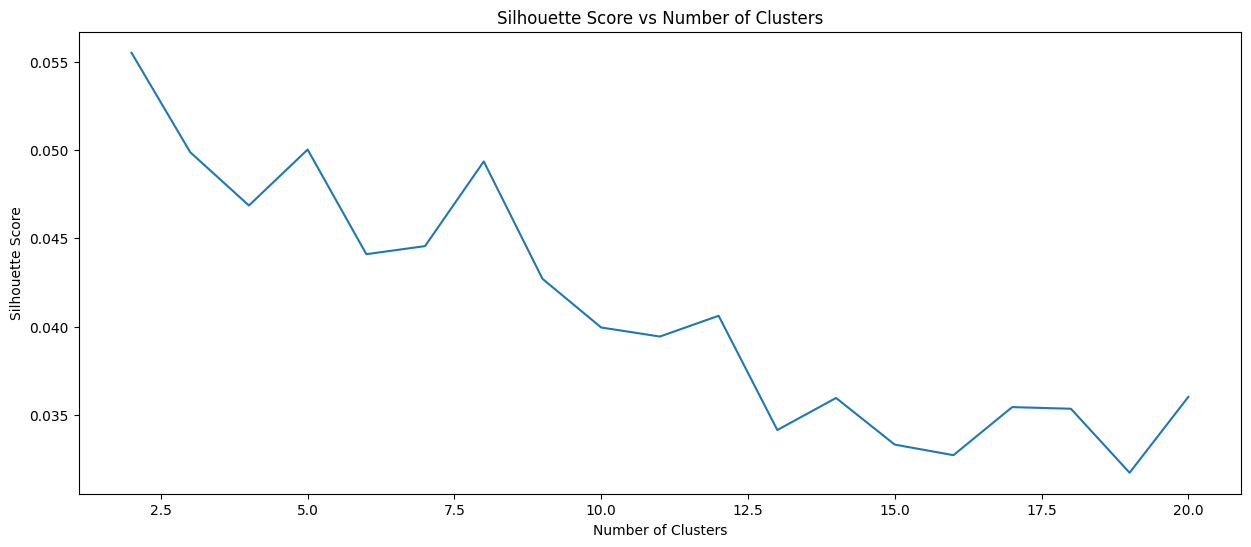

In [58]:
scores = calculate_silhouette_scores(X_reduced, max_clusters)

plot_silhouette_scores(scores)

100%|██████████| 10/10 [06:55<00:00, 41.55s/it]


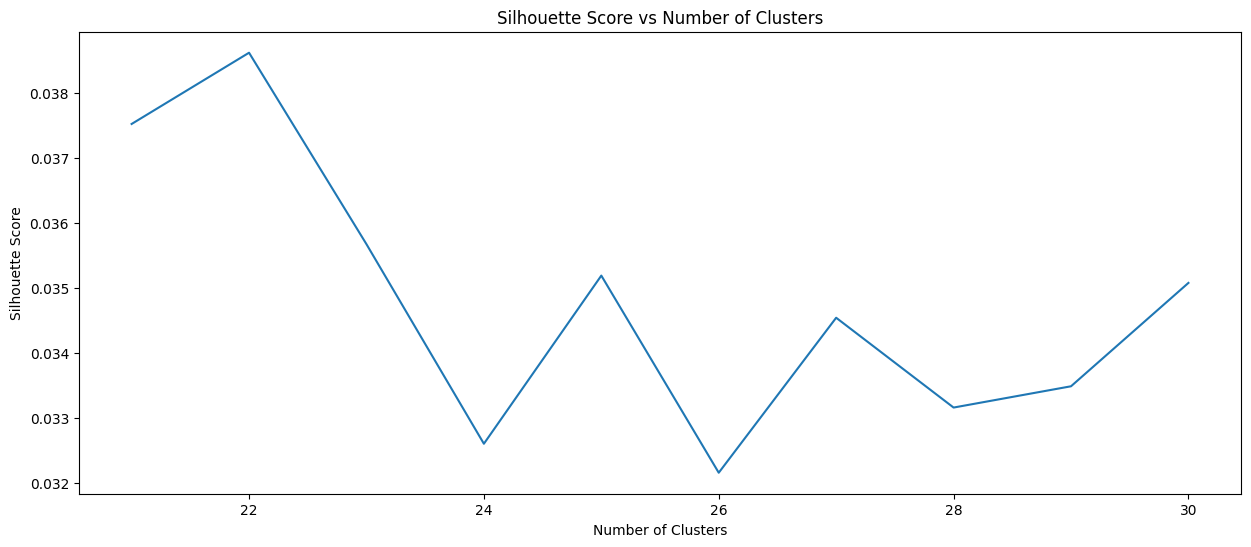

In [57]:
max_clusters_2 = range(21, 30 + 1)
scores_2 = calculate_silhouette_scores(X_reduced, max_clusters_2)

plot_silhouette_scores(scores_2)

### Silhouette Analysis for KMeans Clustering


The purpose of this analysis is to evaluate the quality and interpretability of KMeans clustering results using silhouette analysis. Silhouette analysis provides a graphical representation of cluster cohesion and separation, allowing for the assessment of clustering effectiveness and the identification of optimal cluster configurations.

**Methodology:**
The analysis employs the following methodology:

1. **Parameter Selection:**
   - The range of cluster numbers (`range_n_clusters`) to evaluate is predefined.
   - The dataset `X_reduced` obtained from PCA dimensionality reduction is used for clustering.

2. **Silhouette Calculation:**
   - For each cluster number in the predefined range, KMeans clustering is performed.
   - Silhouette scores are computed to quantify the quality of clustering, with higher scores indicating better-defined clusters.

3. **Silhouette Plotting:**
   - For each cluster number, silhouette plots are generated to visualize the distribution of silhouette coefficients.
   - Each silhouette plot consists of:
     - A silhouette coefficient bar plot for each cluster, indicating the silhouette coefficient values for individual data points within the cluster.
     - A dashed red line representing the average silhouette score across all clusters.
   - The silhouette coefficient values range from -1 to 1, where values close to 1 indicate well-clustered data points, values close to 0 indicate overlapping clusters, and negative values indicate misclassified data points.

4. **Cluster Visualization:**
   - In addition to silhouette plots, scatter plots of the clustered data are generated to visualize the distribution of data points in feature space.
   - Cluster centers are marked with white circles, and individual data points are colored based on their assigned cluster labels.

For n_clusters = 2 The average silhouette_score is : 0.06000574358229102
For n_clusters = 5 The average silhouette_score is : 0.05002015709168128
For n_clusters = 8 The average silhouette_score is : 0.03618749858741665
For n_clusters = 12 The average silhouette_score is : 0.045966167019799595
For n_clusters = 14 The average silhouette_score is : 0.041716261497664206
For n_clusters = 17 The average silhouette_score is : 0.0368857952222055
For n_clusters = 18 The average silhouette_score is : 0.03892693335954069
For n_clusters = 20 The average silhouette_score is : 0.0373171754963901


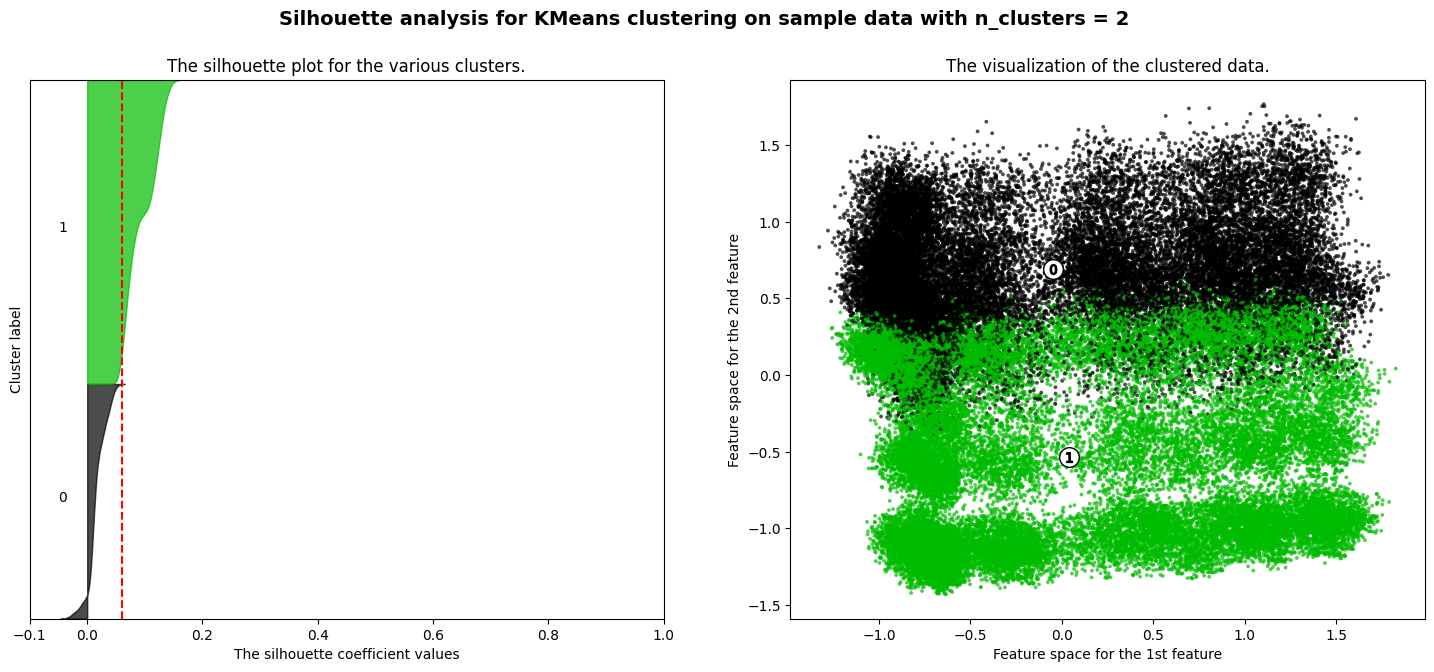

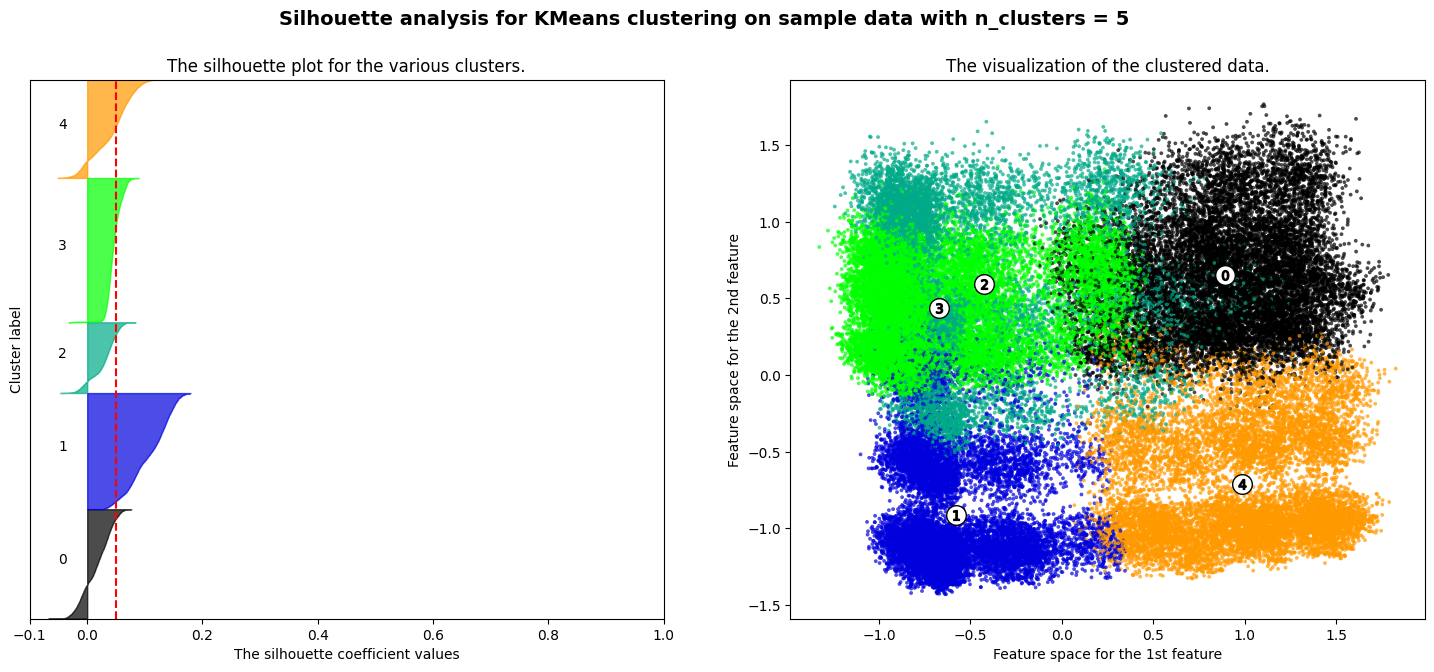

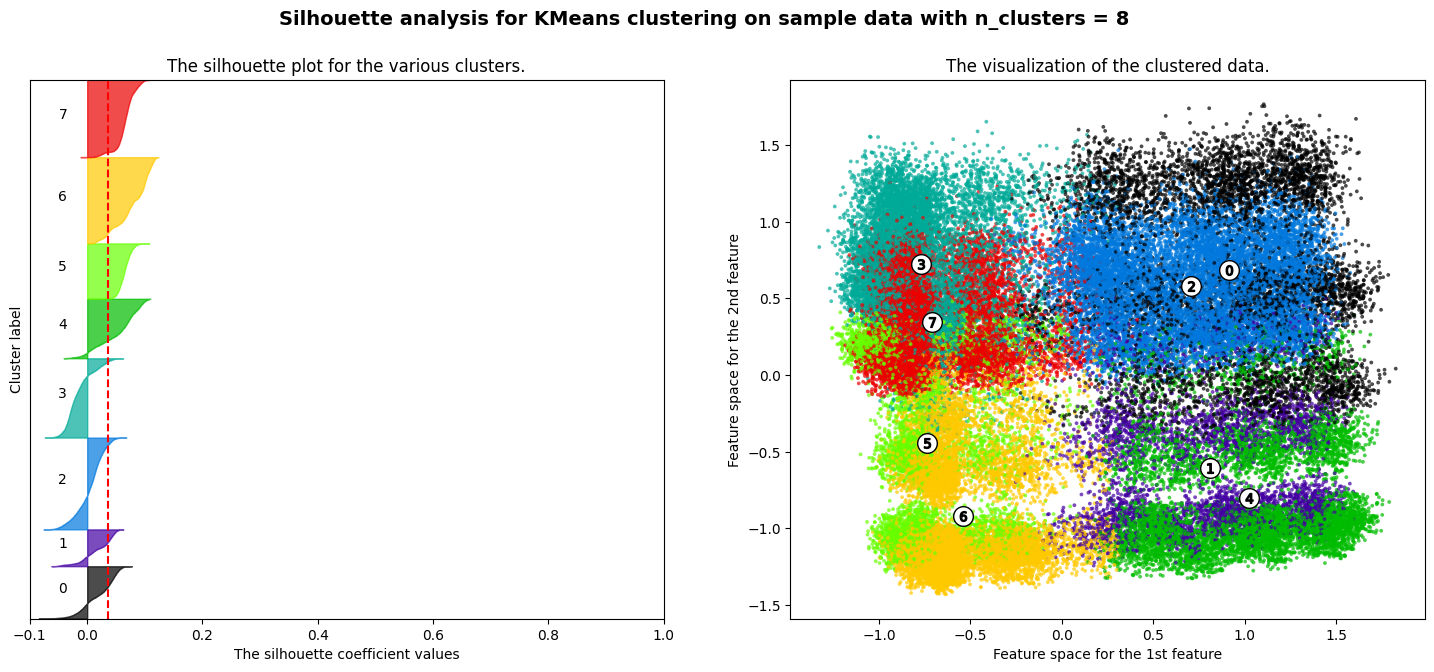

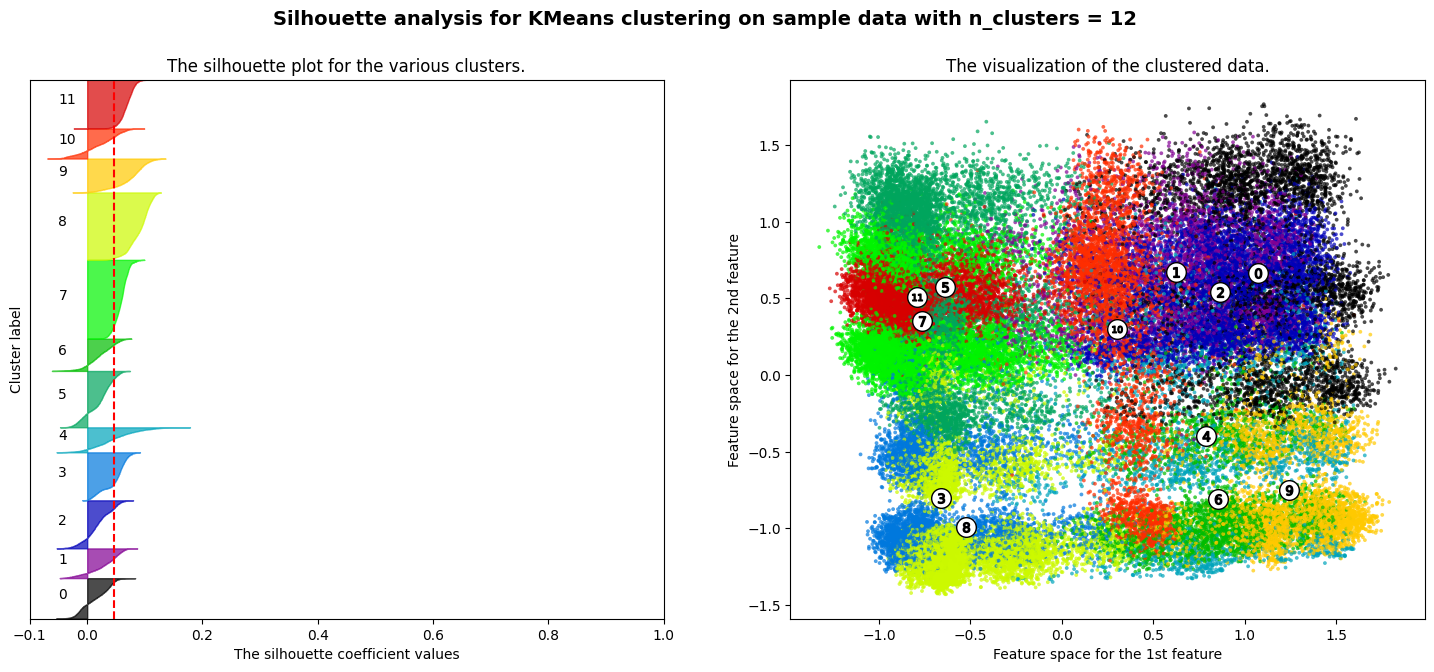

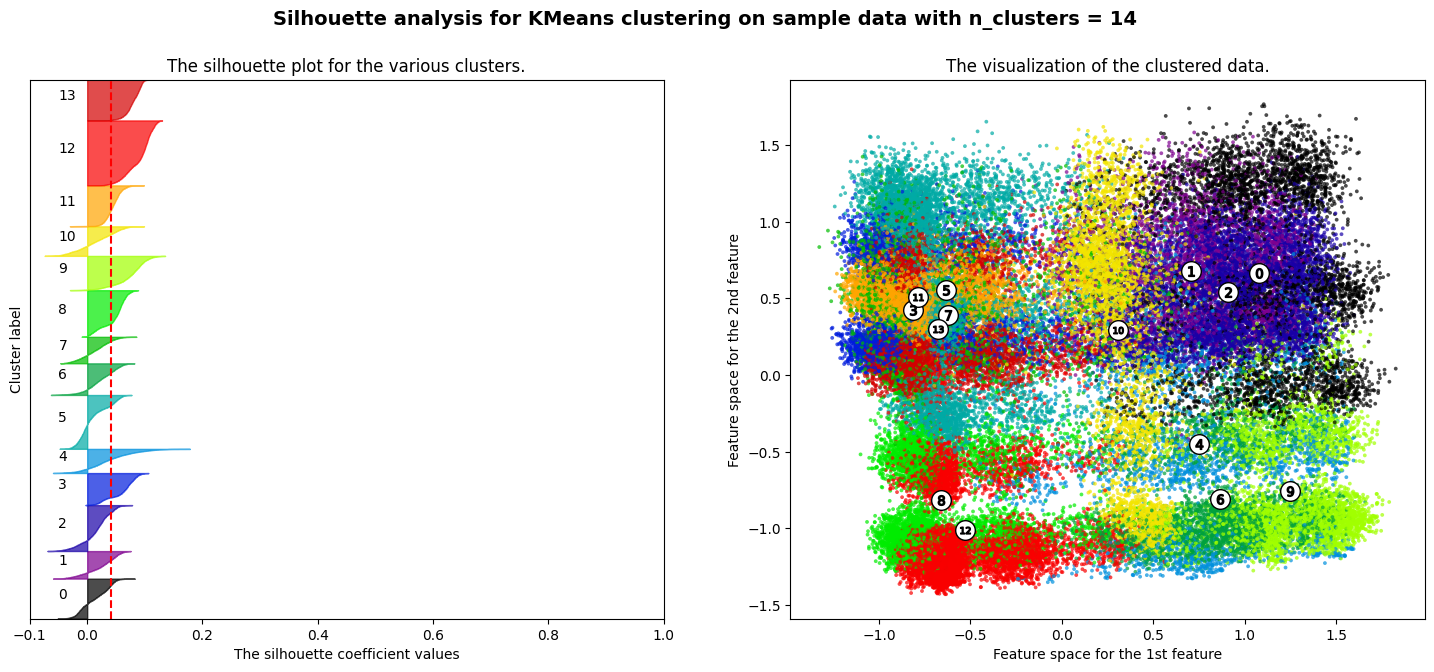

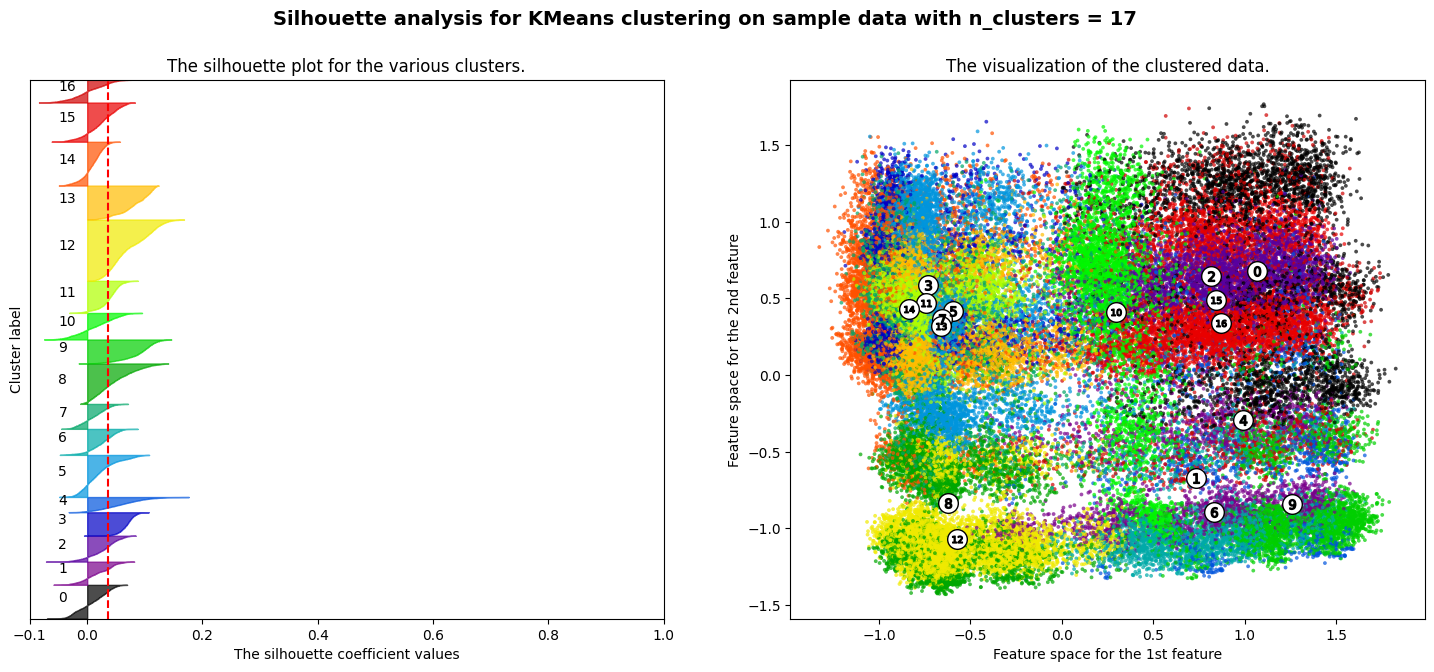

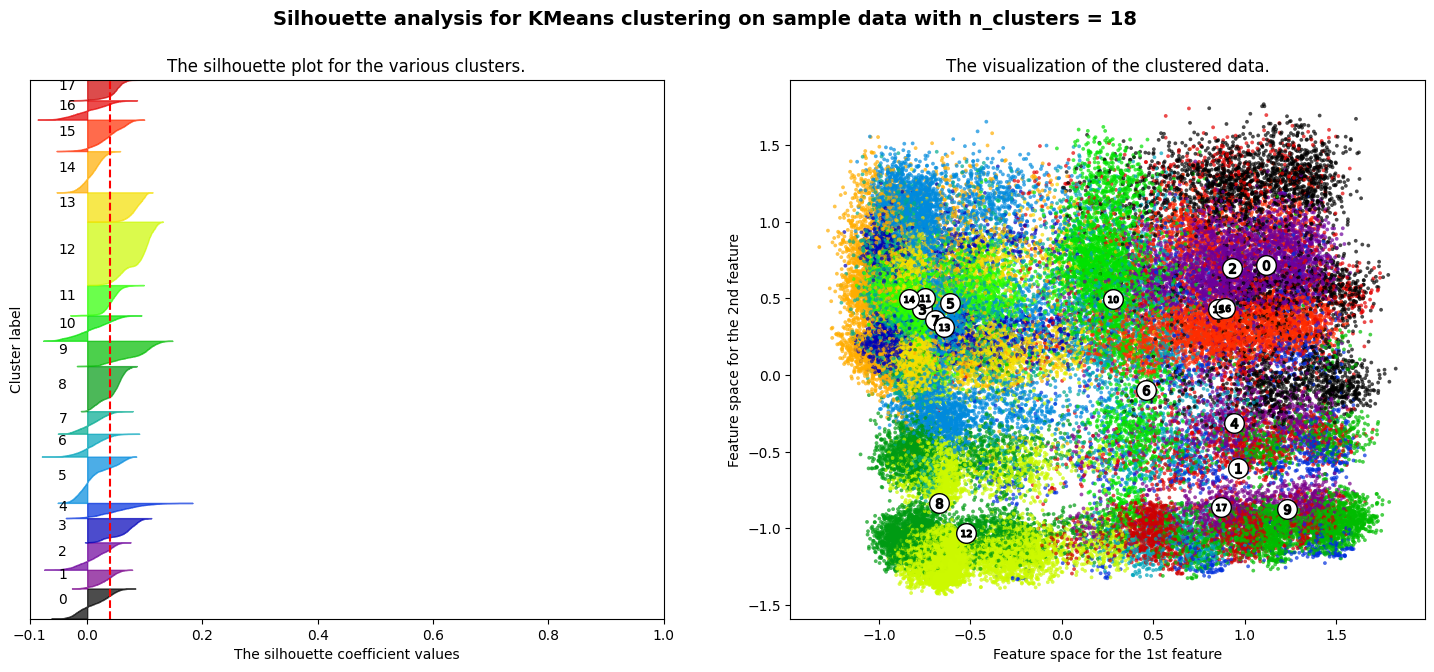

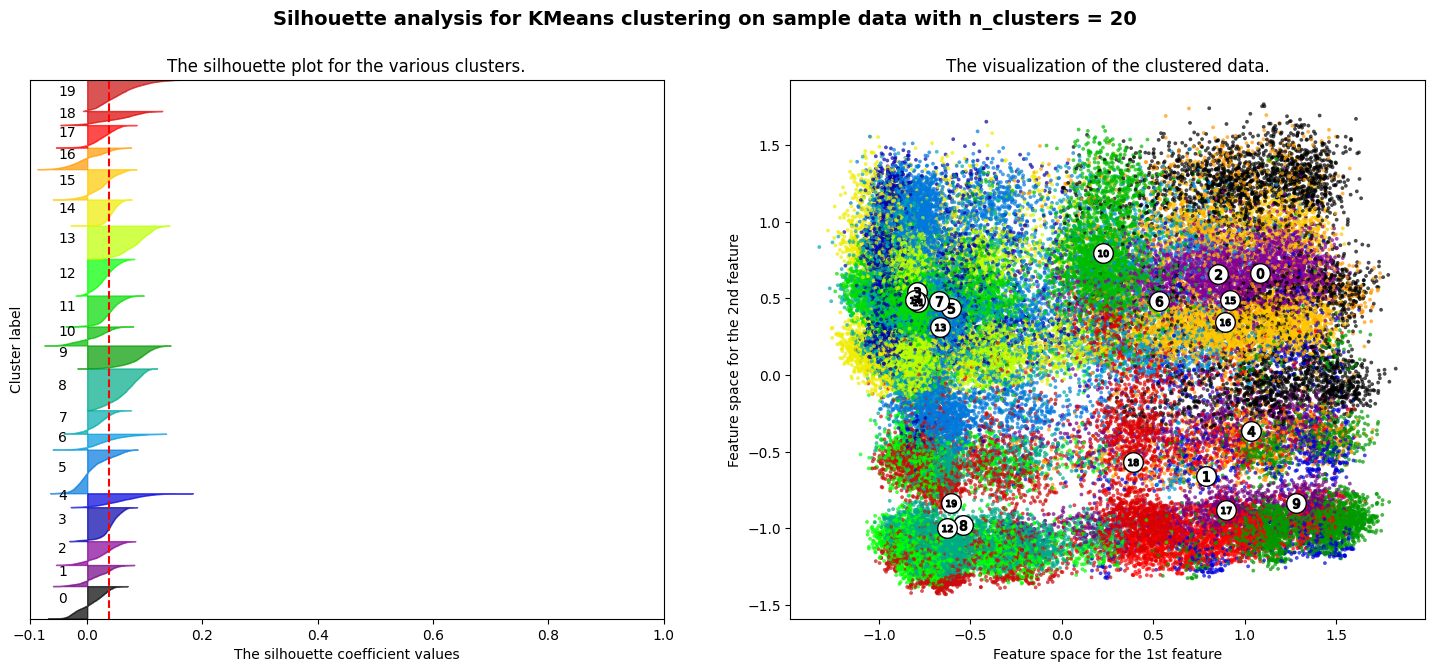

In [59]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 5, 8, 12, 14, 17, 18, 20]
X = X_reduced

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## DBSCAN

 #### Parameter Tuning for DBSCAN Clustering

The purpose of this code is to tune the hyperparameters, namely `min_samples` and `eps`, for DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering. The goal is to identify the optimal combination of `min_samples` and `eps` values that maximize the silhouette score, indicating better clustering performance.

**Methodology:**
The methodology involves an exhaustive search over a predefined range of `min_samples` and `eps` values. The steps are outlined as follows:

1. **Parameter Initialization:**
   - `DBSCAN` clustering algorithm is instantiated with default parameters.
   - Arrays `min_pts_values` and `eps_values` are initialized with ranges of `min_samples` and `eps` values, respectively.

2. **Hyperparameter Tuning Loop:**
   - Nested loops iterate over each combination of `min_samples` and `eps` values.
   - Within each iteration:
     - DBSCAN's parameters (`min_samples` and `eps`) are set to the current values.
     - DBSCAN clustering is performed on the reduced dataset `X_reduced`.
     - Silhouette score is computed based on the clustering results.
     - The silhouette score is compared to the current best score, and if it is lower, the current combination of hyperparameters is updated as the best one.



In [ ]:

from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

min_pts_values = np.arange(2, 20, 2)  
eps_values = np.logspace(-3, 1, num=30) 

best_eps = None
best_min_pts = None
best_score = float('inf')

for min_pts in min_pts_values:
    for eps in eps_values:
        dbscan.set_params(min_samples=min_pts, eps=eps)
        labels = dbscan.fit_predict(X_reduced)
        
        score = silhouette_score(X_reduced, labels)
        
        if score < best_score:
            best_score = score
            best_eps = eps
            best_min_pts = min_pts

print(f"Best parameters: minPts={best_min_pts}, eps={best_eps}")


# Questions


### 1. What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.


1. **Replacing Specific Values with NaN in DataFrame**:
   - **Reason**: Certain specific values, such as "?", "Unknown/Invalid", "NULL", "Not Available", and "Not Mapped", often indicate missing or unknown data. Replacing these values with `NaN` (Not a Number) standardizes the representation of missing values, ensuring consistency in data handling and facilitating subsequent analyses.

2. **Converting Bins in Numerical Age and Weight to Mean of Corresponding Bucket**:
   - **Reason**: Binning numerical features like age and weight can reduce noise and improve model performance by capturing underlying patterns or trends. Calculating the mean value for each bin provides a representative value that maintains the information contained within the original feature while reducing the number of unique values, making it more manageable for analysis and modeling.

3. **Drop Unnecessary Columns**:
   - **Reason**: Removing unnecessary columns streamlines the dataset and focuses the analysis on relevant features, reducing computational overhead and potential noise in the data. Columns such as "max_glu_serum", "weight", "A1Cresult", "medical_specialty", and "payer_code" may not contribute significantly to the analysis or may contain a high percentage of missing values, making them candidates for removal.

4. **Parsing Mappings from CSV File**:
   - **Reason**: Parsing mappings from a CSV file allows for the transformation of categorical IDs into meaningful descriptions, enhancing the interpretability of the data. This step facilitates understanding and analysis by replacing cryptic IDs with descriptive labels, such as admission types or discharge dispositions.

5. **Normalizing**:
   - **Reason**: Normalizing numerical features ensures that all features contribute equally to the analysis, preventing features with larger scales from dominating the model training process. Normalization scales the features to a common range, typically between 0 and 1, preserving the relative relationships between data points while standardizing their magnitudes.

6. **Removing Outliers from Numerical Columns**:
   - **Reason**: Outliers can skew statistical analyses and model predictions, leading to inaccurate results. Removing outliers from numerical columns improves the robustness and reliability of the dataset by eliminating extreme values that may distort the distribution or influence model training. The removal process typically involves calculating the Interquartile Range (IQR) and excluding data points lying outside a certain range from the dataset.

7. **One-Hot Encoding on Categorical Columns**:
   - **Reason**: One-hot encoding transforms categorical variables into a binary format, where each category becomes a separate binary feature. This process allows categorical data to be incorporated into machine learning models, which typically require numerical inputs. One-hot encoding prevents the model from interpreting categorical variables as ordinal and avoids the introduction of false numerical relationships between categories.



### 2. What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?
In the  code, PCA (Principal Component Analysis) is performed with the parameter `n_components=0.95`, indicating that the retained portion of the dataset accounts for 95% of the total variance. The variables retained correspond to the principal components (PCs) generated by PCA, with each PC representing a linear combination of the original variables in the dataset.

Rationale:
- Retaining 95% of the variance ensures that a significant amount of information from the original dataset is preserved while reducing its dimensionality.
- By selecting a threshold of 95%, we aim to balance the trade-off between dimensionality reduction and information retention.
- PCA automatically selects the appropriate number of principal components to achieve the specified variance threshold, ensuring that the retained components capture the most important patterns and variability in the data.



### 3. Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.

### 4. How can we determine the optimal number of clusters in K-Means?

Determining the optimal number of clusters in K-Means can be challenging but can be approached using various methods. Here are some common techniques:

1. **Elbow Method**:
   - Plot the within-cluster sum of squares (WCSS) against the number of clusters (k).
   - Look for the "elbow" point in the plot, where the rate of decrease in WCSS starts to slow down.
   - The optimal number of clusters is typically located at the elbow point, indicating a significant reduction in WCSS with minimal increase in complexity.

2. **Silhouette Score**:
   - Calculate the silhouette score for different values of k.
   - The silhouette score measures the cohesion and separation of clusters, with values ranging from -1 to 1. Higher scores indicate better-defined clusters.
   - Choose the value of k that maximizes the silhouette score, representing the optimal balance between cluster cohesion and separation.

3. **Gap Statistics**:
   - Compare the WCSS of the observed data with that of randomly generated data (null model) with varying numbers of clusters.
   - Calculate the gap statistic, which quantifies the difference between the observed and random WCSS.
   - Select the number of clusters that maximizes the gap statistic, indicating a significant improvement over random clustering.

4. **Silhouette Method**:
   - Compute the silhouette coefficient for each data point across different values of k.
   - Plot the average silhouette score against the number of clusters.
   - Identify the value of k that maximizes the average silhouette score, indicating well-separated and compact clusters.

5. **Cross-Validation**:
   - Split the dataset into training and validation sets.
   - Fit K-Means models with different values of k on the training set.
   - Evaluate the performance of each model using a validation metric (e.g., silhouette score or WCSS).
   - Select the value of k that yields the best performance on the validation set.

6. **Domain Knowledge**:
   - Consider the context and domain-specific information to determine a reasonable range of clusters.
   - Prior knowledge about the underlying structure of the data or the expected number of groups can guide the selection of k.



### 5. How can we determine the optimal epsilon value and minPts in DBSCAN?

Determining the optimal epsilon value (ε) and minPts (minimum number of points) in DBSCAN (Density-Based Spatial Clustering of Applications with Noise) involves a combination of techniques and considerations. Here's how you can approach it:

1. **Visual Inspection**:
   - Visualize the dataset in a scatter plot and examine its density and distribution.
   - Choose an initial value for epsilon that reflects the typical distance between neighboring points.

2. **K-Distance Plot**:
   - Calculate the distance to the k-th nearest neighbor (k-distance) for each point in the dataset, where k is the minPts parameter.
   - Sort the distances in ascending order.
   - Plot the sorted k-distance values.
   - Look for a "knee point" or significant change in slope, which indicates a transition from points within clusters to those in noise regions.
   - The epsilon value corresponding to the knee point can serve as a starting point for experimentation.

3. **Reachability Plot**:
   - For each point, compute the reachability distance to its minPts neighbors.
   - Sort the reachability distances in descending order.
   - Plot the sorted reachability distances.
   - Look for valleys or dips in the plot, which may indicate potential epsilon values.

4. **Silhouette Score**:
   - Perform DBSCAN clustering with different combinations of epsilon and minPts.
   - Compute the silhouette score for each clustering result.
   - Choose the combination of epsilon and minPts that maximizes the silhouette score, indicating well-defined clusters and minimal noise.

5. **Visual Evaluation**:
   - Visualize the clustering results for different combinations of epsilon and minPts.
   - Inspect the resulting clusters and noise points to ensure they align with the underlying structure of the data.
   - Adjust epsilon and minPts as needed based on the visual inspection.

6. **Domain Knowledge**:
   - Consider domain-specific knowledge about the dataset and the characteristics of the underlying data distribution.
   - Epsilon and minPts should be chosen to reflect the inherent density and structure of the data, as well as the desired granularity of the resulting clusters.

7. **Grid Search**:
   - Perform a grid search over a range of epsilon and minPts values.
   - Evaluate the clustering results using a performance metric (e.g., silhouette score) or visual inspection.
   - Select the combination of epsilon and minPts that yields the best clustering performance.

8. **Iterative Adjustment**:
   - Start with initial values for epsilon and minPts.
   - Perform DBSCAN clustering and evaluate the results.
   - Adjust epsilon and minPts based on the observed clustering quality and characteristics of the data.
   - Iterate until satisfactory clustering results are achieved.


### 6. When would you recommend using K-Means, and when would you suggest using DBSCAN instead?

I'd recommend using K-Means when:

1. **Clusters are Globally Convex**: K-Means performs well when clusters are well-separated, roughly spherical, and have similar sizes. It assumes that clusters are compact and isotropic, making it suitable for datasets with clear separation between clusters.

2. **Data is Numerical and Continuous**: K-Means works best with numerical data that can be represented as continuous variables. It calculates cluster centroids by minimizing the sum of squared distances from data points to their respective centroids.

3. **Number of Clusters is Known or Estimated**: K-Means requires specifying the number of clusters (k) beforehand. It's suitable when the number of clusters is known or can be estimated based on domain knowledge or clustering evaluation techniques.

4. **Scalability is Important**: K-Means is computationally efficient and scales well with large datasets and high-dimensional feature spaces. It's suitable for applications where scalability and speed are critical.

I'd suggest using DBSCAN when:

1. **Data has Irregular Shapes and Densities**: DBSCAN is effective for clustering datasets with complex structures, irregular shapes, and varying densities. It can identify clusters of arbitrary shapes and does not assume a predefined number of clusters or cluster shapes.

2. **Presence of Noise and Outliers**: DBSCAN can handle noisy data and automatically detect outliers as points that do not belong to any cluster. It's robust to outliers and does not force every data point into a cluster.

3. **Automated Cluster Detection**: DBSCAN automatically determines the number of clusters based on the density of the data. It's suitable for situations where the number of clusters is unknown or varies across different parts of the dataset.

4. **Parameter Sensitivity is Low**: DBSCAN has fewer parameters to tune compared to K-Means. Once the epsilon (ε) and minPts parameters are set, DBSCAN is relatively insensitive to their exact values and can produce stable clustering results.
